# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

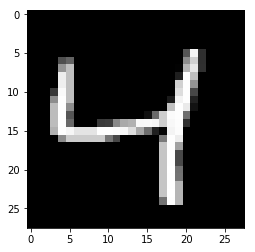

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [27]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,shape=(None,784))
targets_ = tf.placeholder(tf.float32,shape=(None,784))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,784,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [28]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [29]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6886
Epoch: 1/20... Training loss: 0.6856
Epoch: 1/20... Training loss: 0.6817
Epoch: 1/20... Training loss: 0.6769
Epoch: 1/20... Training loss: 0.6714
Epoch: 1/20... Training loss: 0.6647
Epoch: 1/20... Training loss: 0.6572
Epoch: 1/20... Training loss: 0.6494
Epoch: 1/20... Training loss: 0.6389
Epoch: 1/20... Training loss: 0.6260
Epoch: 1/20... Training loss: 0.6126
Epoch: 1/20... Training loss: 0.5986
Epoch: 1/20... Training loss: 0.5828
Epoch: 1/20... Training loss: 0.5642
Epoch: 1/20... Training loss: 0.5481
Epoch: 1/20... Training loss: 0.5322
Epoch: 1/20... Training loss: 0.5104
Epoch: 1/20... Training loss: 0.4930
Epoch: 1/20... Training loss: 0.4808
Epoch: 1/20... Training loss: 0.4597
Epoch: 1/20... Training loss: 0.4398
Epoch: 1/20... Training loss: 0.4273
Epoch: 1/20... Training loss: 0.4179
Epoch: 1/20... Training loss: 0.4003
Epoch: 1/20... Training loss: 0.3883
E

Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1813
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1806
Epoch: 1/20... Training loss: 0.1805
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1866
E

Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1496
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1547
E

Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1380
E

Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1264
E

Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1159
E

Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1156
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1104
E

Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1083
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1075
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1027
E

Epoch: 7/20... Training loss: 0.0948
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0999
E

Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0918
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0963
E

Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0949
E

Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.1012
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20

Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0997
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0995
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0872
Epoch: 13/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0891
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0891
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0990
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

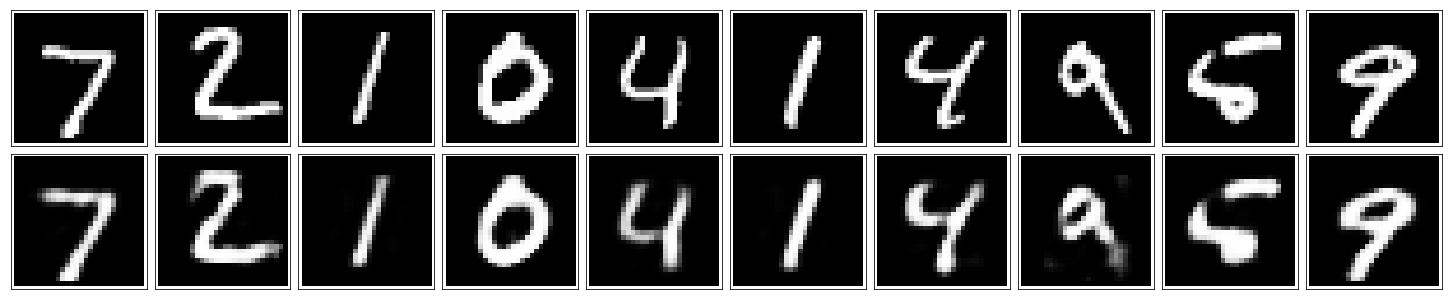

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [31]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.